This is a machine learning notebook on the MNIST Dataset.

In [1]:
from keras.datasets import mnist

More about this dataset can be found on this link: http://yann.lecun.com/exdb/mnist/

Let's now import some important libraries.

In [24]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.utils import plot_model, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop, Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

In [11]:
import opendatasets as od

od.download('https://www.kaggle.com/competitions/digit-recognizer/data?select=test.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: andreasmisiris
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 15.3M/15.3M [00:11<00:00, 1.45MB/s]



Extracting archive .\digit-recognizer/digit-recognizer.zip to .\digit-recognizer


In [3]:
train = pd.read_csv('digit-recognizer/train.csv')
test = pd.read_csv('digit-recognizer/test.csv')

In [4]:
Y_train = train["label"]
X_train = train.drop(labels=["label"], axis=1)

Let's take a look at our training data!

<Axes: xlabel='label', ylabel='count'>

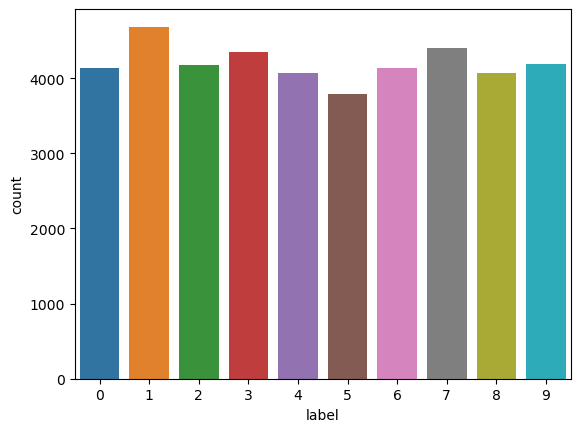

In [5]:
sns.countplot(data = train, x = 'label')

It's almost a balanced datasets, as we can see.

In [6]:
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

train1 = np.concatenate([x_train1, x_test1], axis=0)
y_train1 = np.concatenate([y_train1, y_test1], axis=0)

Y_train1 = y_train1
X_train1 = train1.reshape(-1, 28 * 28)

More data is always better for our models. We can merge the two datasets to create more data.

In [7]:
# Normalization
X_train = X_train / 255.0
X_test = test / 255.0

X_train1 = X_train1 / 255.0

In [8]:
X_train = np.concatenate((X_train, X_train1))
Y_train = np.concatenate((Y_train, Y_train1))

In [9]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [10]:
Y_train = to_categorical(Y_train, num_classes=10)

In [11]:
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
X_train.shape

(112000, 28, 28, 1)

In [13]:
Y_train.shape

(112000, 10)

Split the train dataset into train and validation data.

In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)

In [15]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((100800, 28, 28, 1), (11200, 28, 28, 1), (100800, 10), (11200, 10))

# Convolutional Neural Networks (CNN)

A convolutional neural network (CNN), is a network architecture for deep learning which learns directly from data. CNNs are particularly useful for finding patterns in images to recognize objects. They can also be quite effective for classifying non-image data such as audio, time series, and signal data.

In [16]:
import tensorflow as tf

In [17]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',  activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation ='softmax'))

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
batch_size = 128

datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.10,
        width_shift_range=0.1,
        height_shift_range=0.1)

train_gen = datagen.flow(X_train, Y_train, batch_size=batch_size)

# Model training!

In [21]:
epochs = 10

history = model.fit(train_gen, epochs=epochs, validation_data = (X_val, Y_val), verbose=2)

Epoch 1/10
788/788 - 24s - loss: 0.1623 - accuracy: 0.9498 - val_loss: 0.0325 - val_accuracy: 0.9888 - 24s/epoch - 30ms/step
Epoch 2/10
788/788 - 18s - loss: 0.0550 - accuracy: 0.9829 - val_loss: 0.0372 - val_accuracy: 0.9876 - 18s/epoch - 23ms/step
Epoch 3/10
788/788 - 18s - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.0173 - val_accuracy: 0.9940 - 18s/epoch - 22ms/step
Epoch 4/10
788/788 - 18s - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0234 - val_accuracy: 0.9928 - 18s/epoch - 22ms/step
Epoch 5/10
788/788 - 18s - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0215 - val_accuracy: 0.9929 - 18s/epoch - 22ms/step
Epoch 6/10
788/788 - 18s - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0247 - val_accuracy: 0.9921 - 18s/epoch - 23ms/step
Epoch 7/10
788/788 - 18s - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0224 - val_accuracy: 0.9934 - 18s/epoch - 23ms/step
Epoch 8/10
788/788 - 18s - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.0132 - val_accuracy: 0.9960 - 18s/epoch - 22ms/step


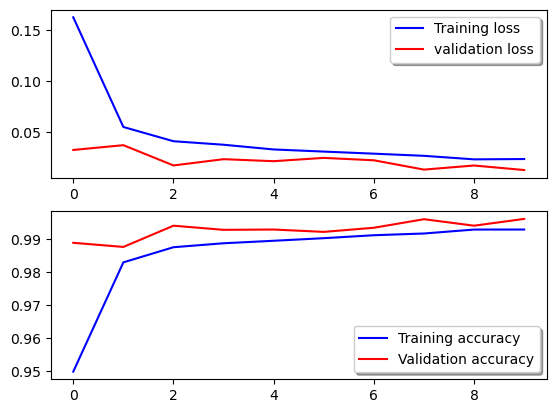

In [22]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [23]:
result = np.zeros((X_test.shape[0], 10)) 

result = model.predict(X_test)
result = np.argmax(result, axis=1)
result = pd.Series(result, name="Label")
submission = pd.concat([pd.Series(range(1, 28001), name="ImageId"), result], axis=1)
submission.to_csv("predictions.csv", index=False)

875/875 [==============================] - 2s 2ms/step
